In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import csv

In [2]:
# Load csv File
df = {'id': [], 'time': [], 'gl': []}

with open('iglu_example_data_5_subject.csv') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        if row[0] == 'id': # exclude row with column names
            continue
            
        df['id'].append(row[0]) # add current row's id
        dt = datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') # convert timestamps to datetime format so graphs dont break
        df['time'].append(dt)
        df['gl'].append(float(row[2])) # Convert glucose levels to floats

df = pd.DataFrame(df)
df

,id,time,gl
0,Subject 1,2015-06-06 16:50:27,153.0
1,Subject 1,2015-06-06 17:05:27,137.0
2,Subject 1,2015-06-06 17:10:27,128.0
3,Subject 1,2015-06-06 17:15:28,121.0
4,Subject 1,2015-06-06 17:25:27,120.0
...,...,...,...
13861,Subject 5,2015-03-11 07:44:28,230.0
13862,Subject 5,2015-03-11 07:49:28,238.0
13863,Subject 5,2015-03-11 07:54:28,244.0
13864,Subject 5,2015-03-11 07:59:28,245.0


In [7]:
# Get # of Subjects (might be useless but scales if we add more subjects)
subjects = []
for id in df.id:
    if id not in subjects:
        subjects.append(id)

# Group Subject Data
subj_data = dict()
for subject in subjects:
    subj_data[subject] = df.loc[df['id'] == subject]

#subj_data

In [4]:
# Index Subject
subj_data['Subject 1']

,id,time,gl
0,Subject 1,2015-06-06 16:50:27,153.0
1,Subject 1,2015-06-06 17:05:27,137.0
2,Subject 1,2015-06-06 17:10:27,128.0
3,Subject 1,2015-06-06 17:15:28,121.0
4,Subject 1,2015-06-06 17:25:27,120.0
...,...,...,...
2910,Subject 1,2015-06-19 08:39:36,115.0
2911,Subject 1,2015-06-19 08:44:36,115.0
2912,Subject 1,2015-06-19 08:49:36,116.0
2913,Subject 1,2015-06-19 08:54:36,116.0


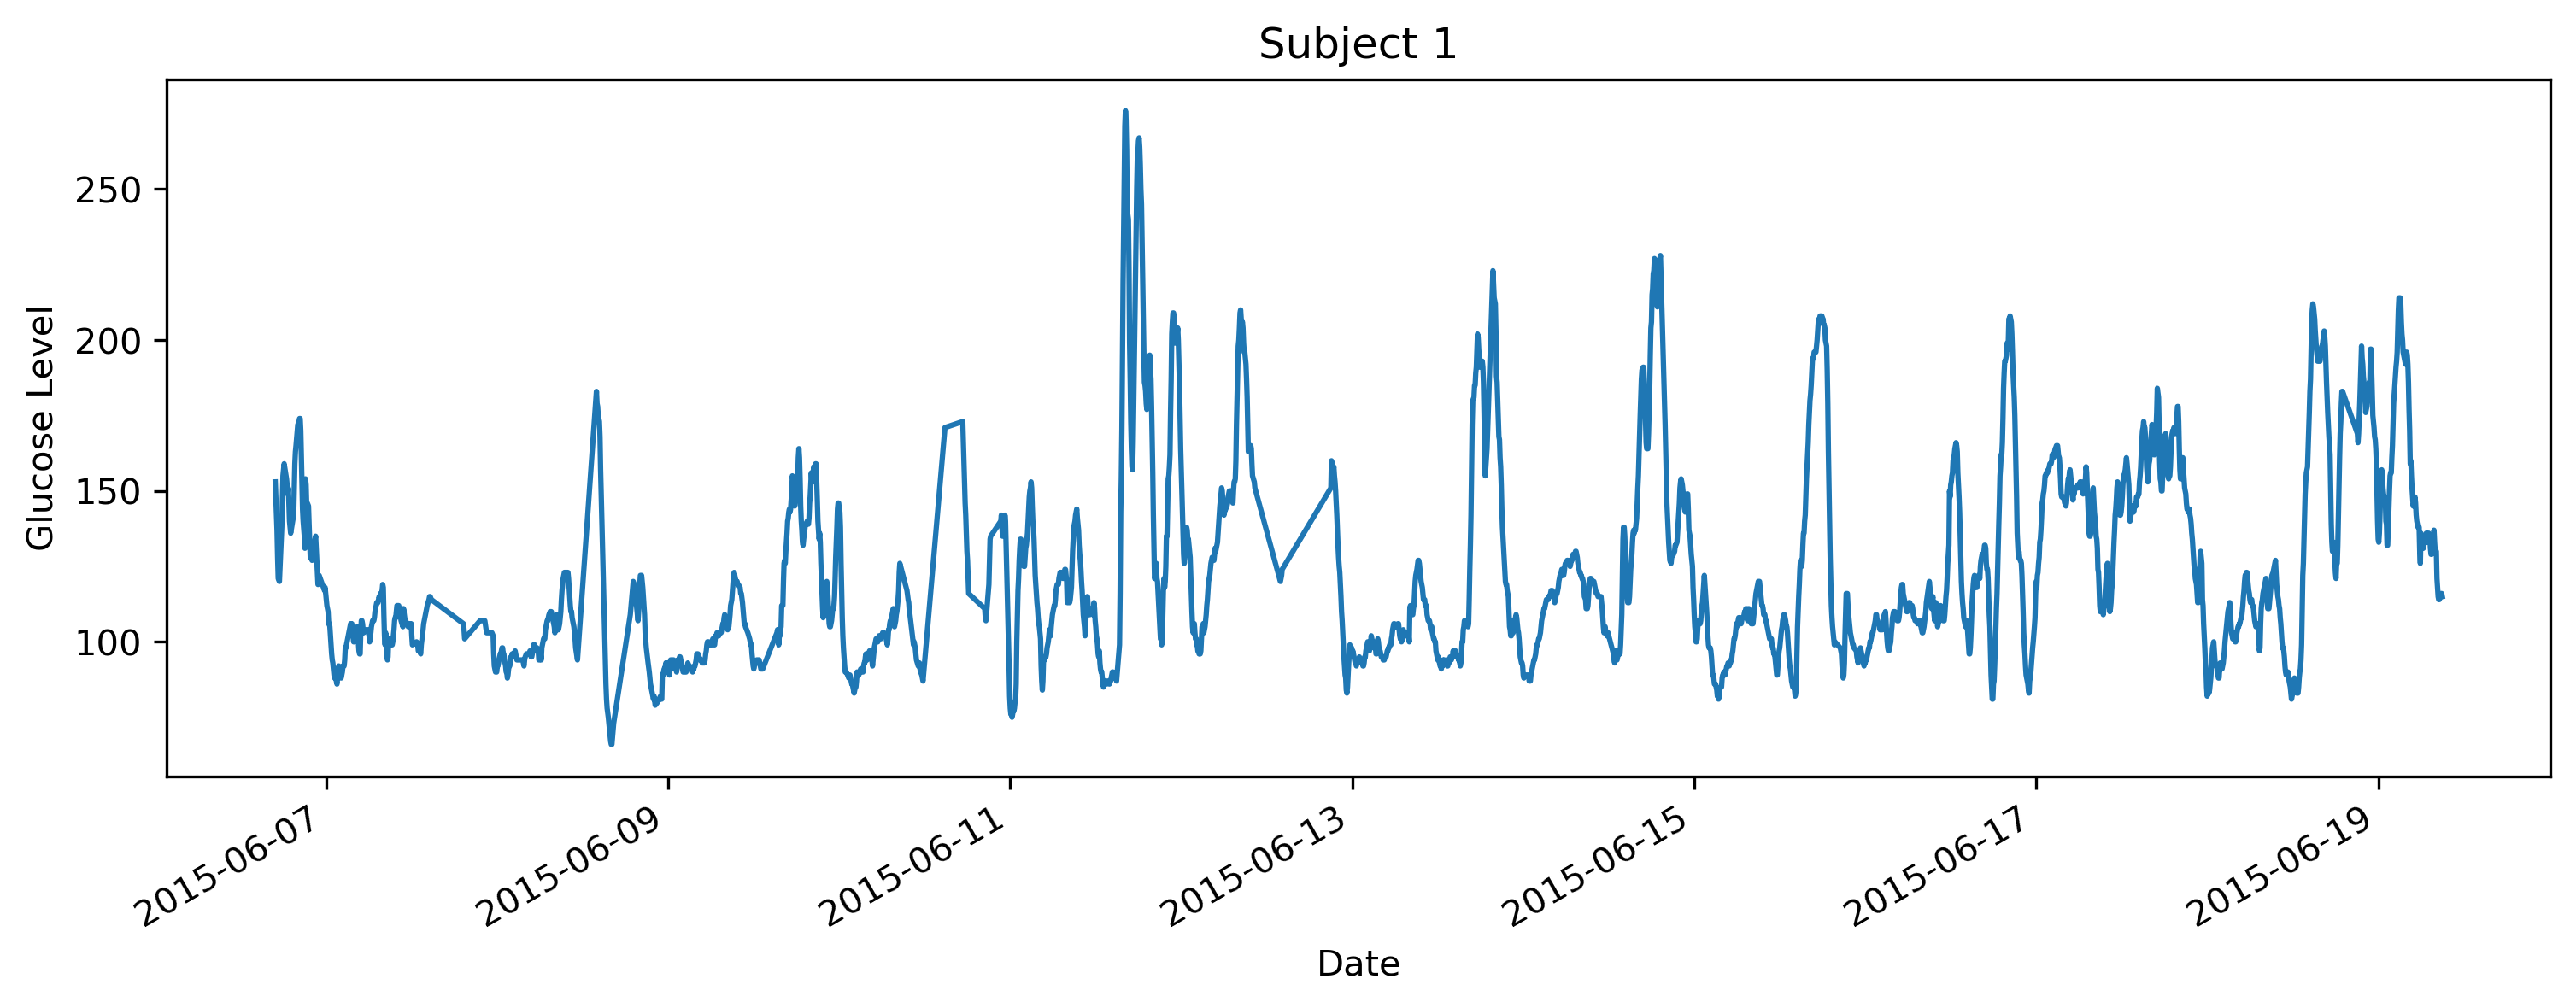

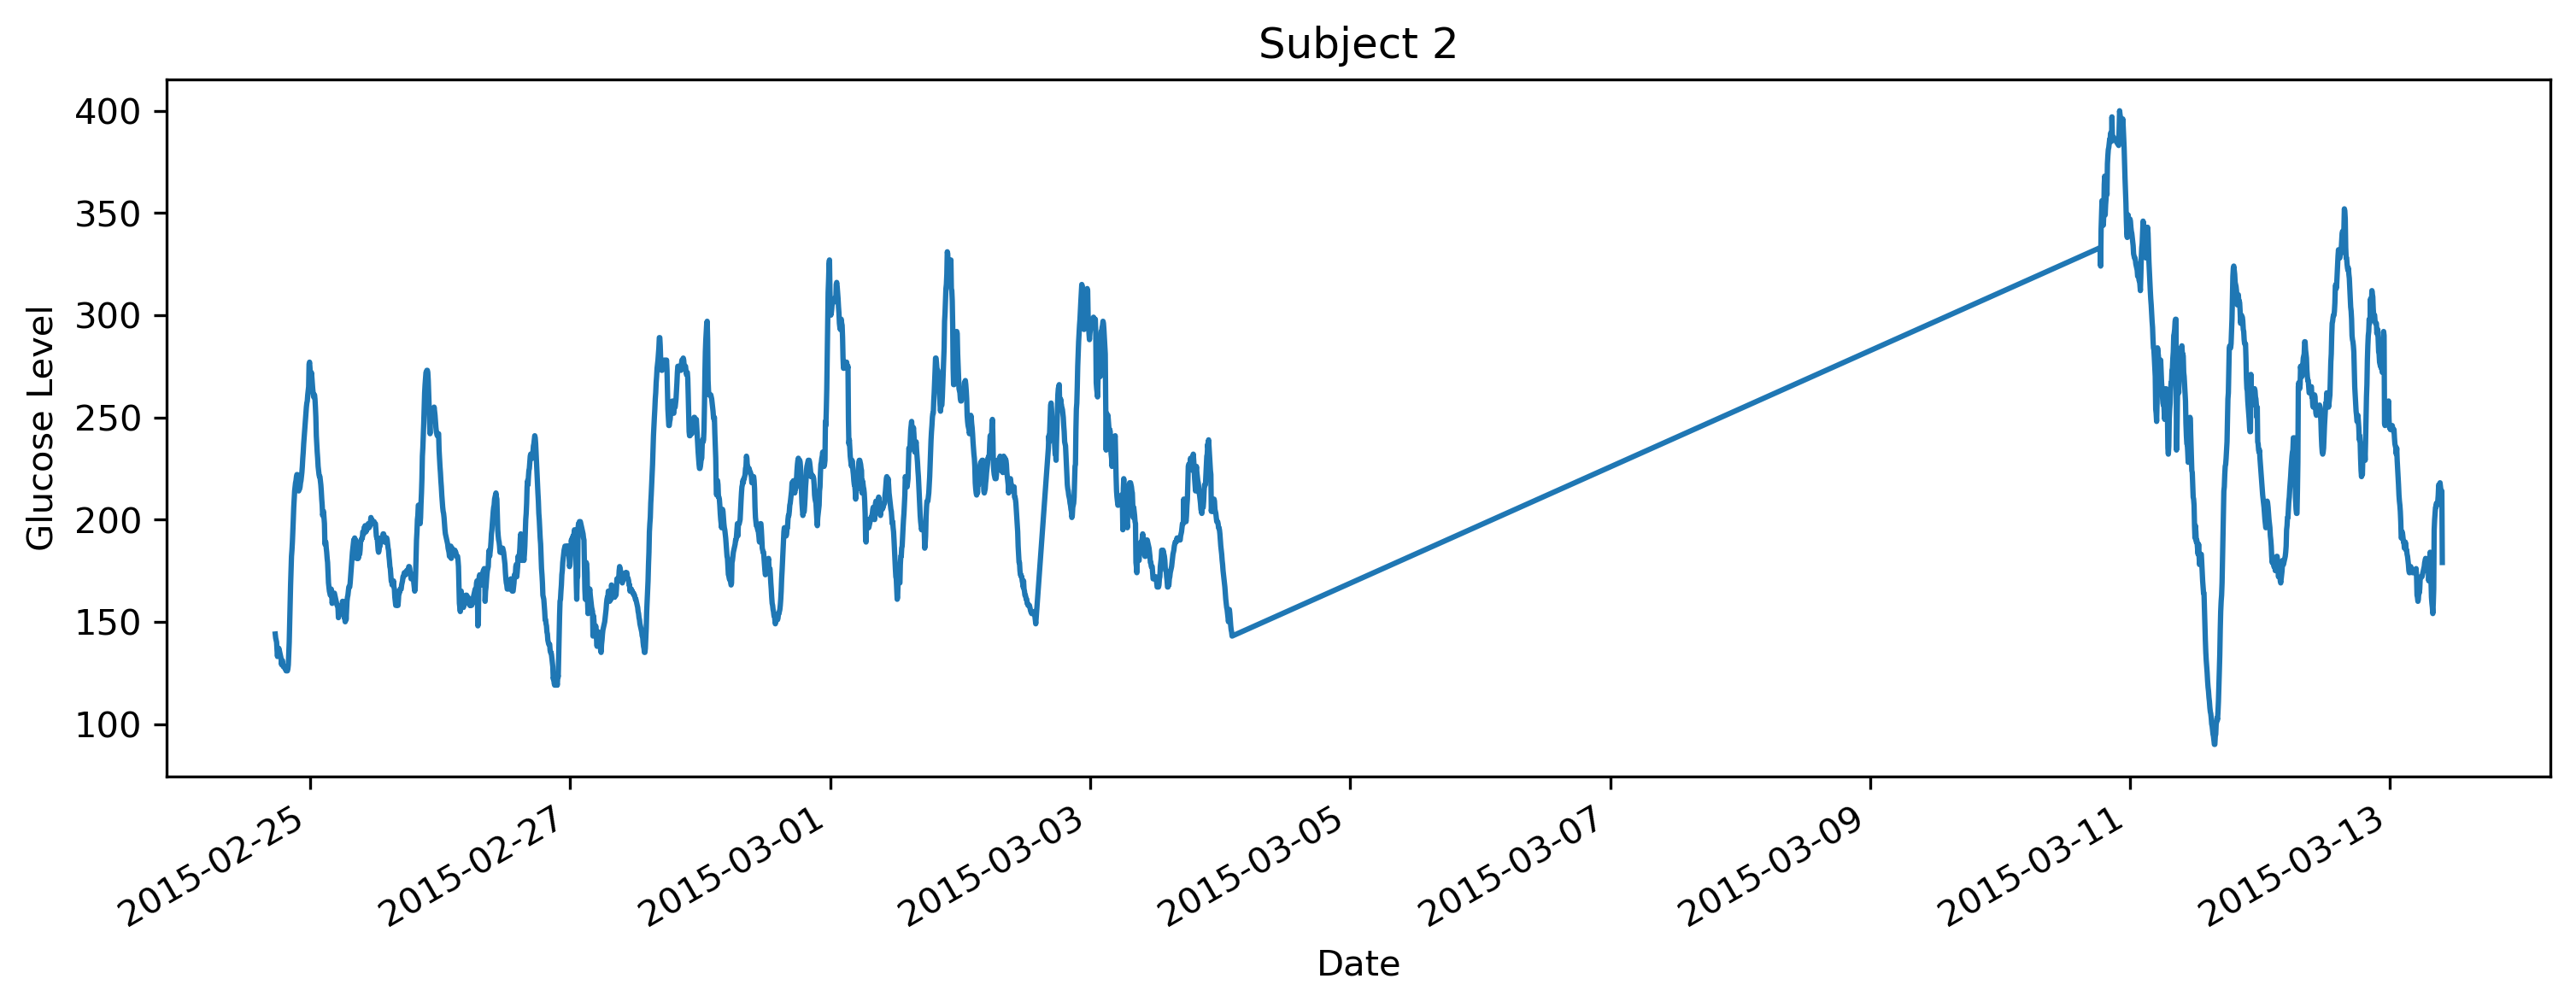

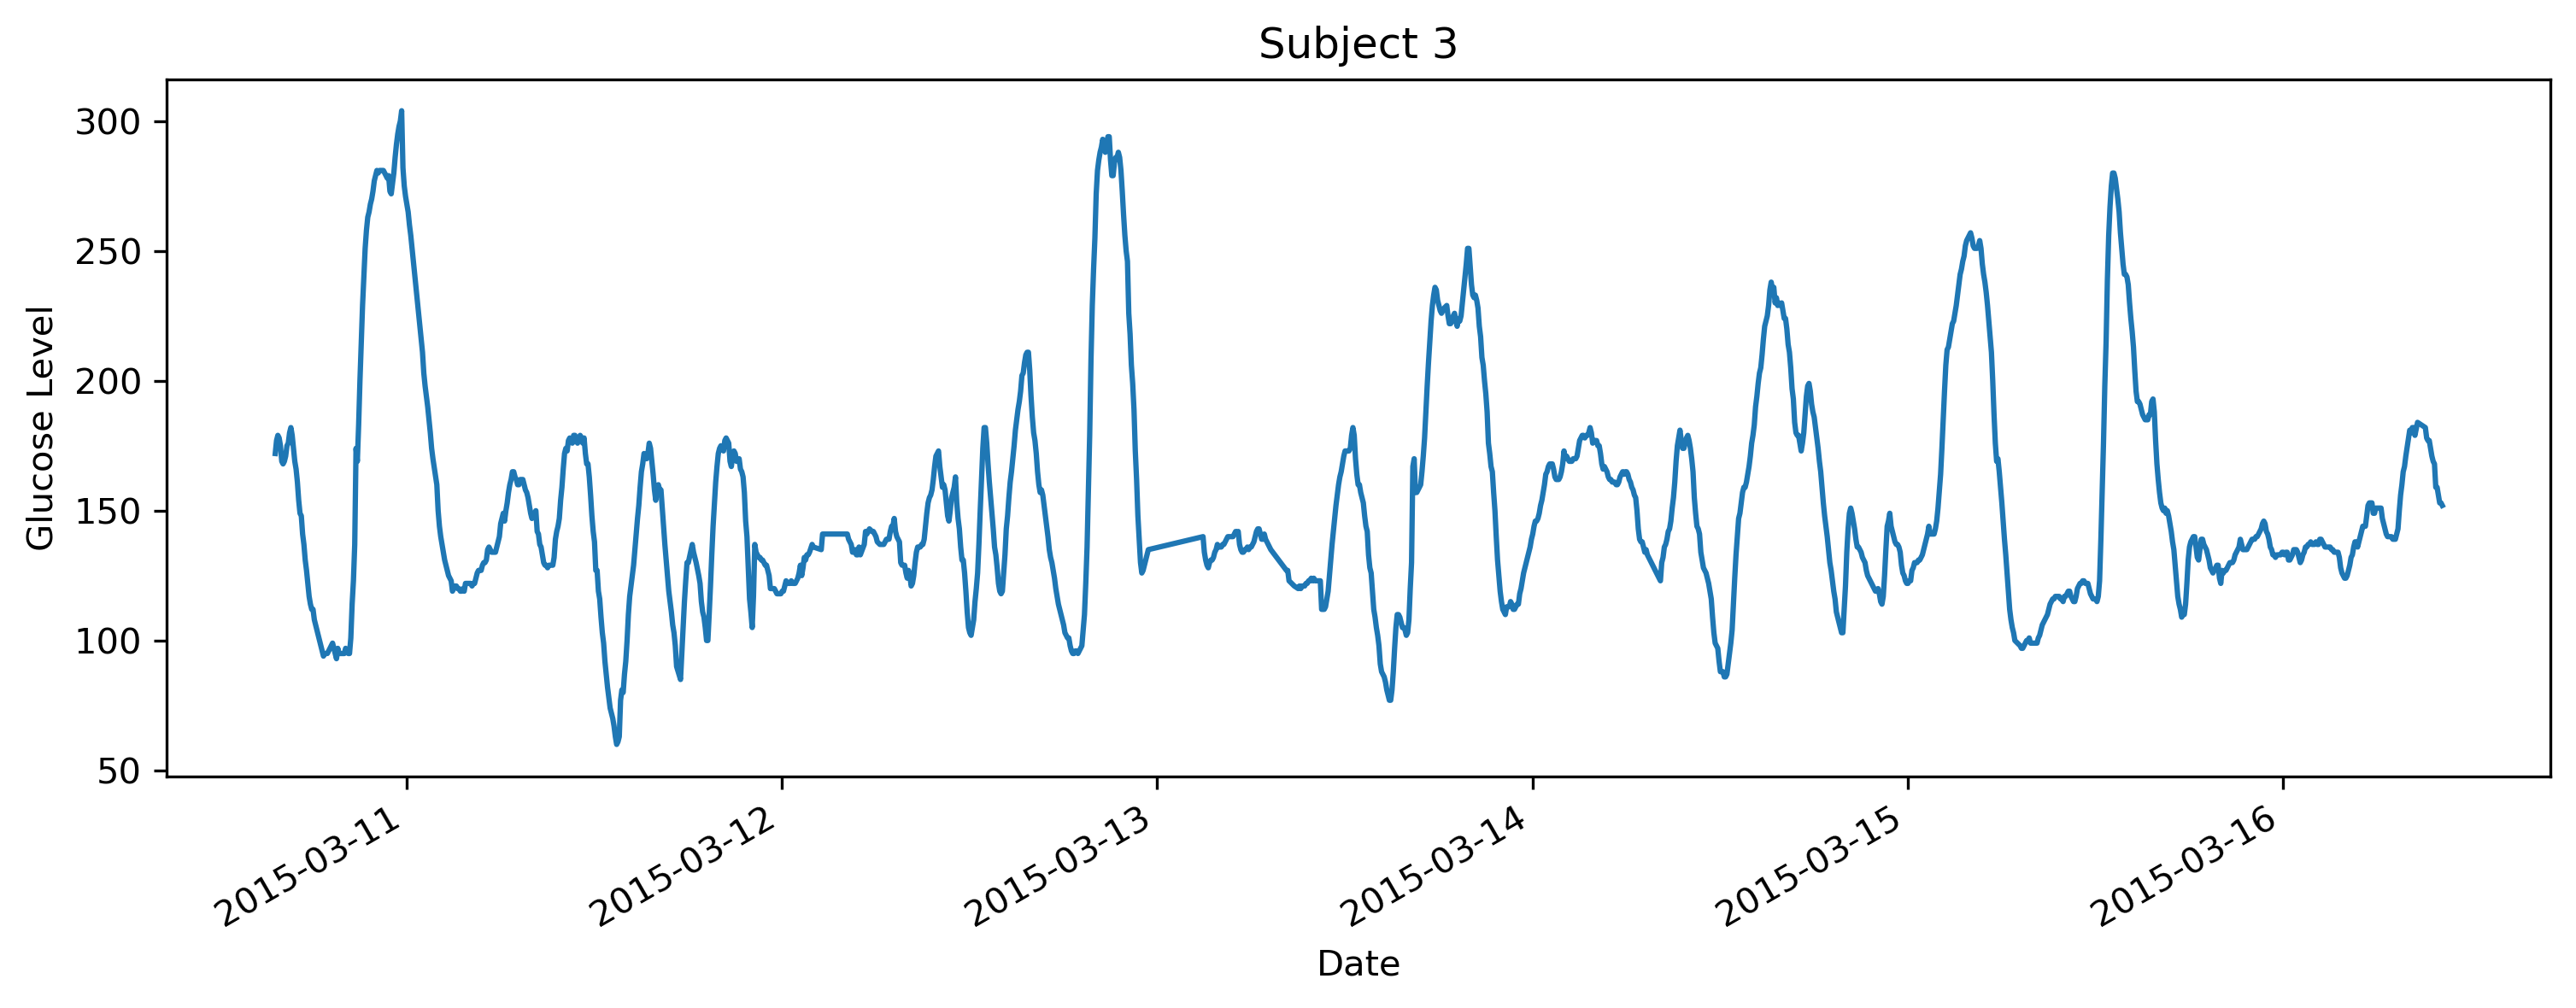

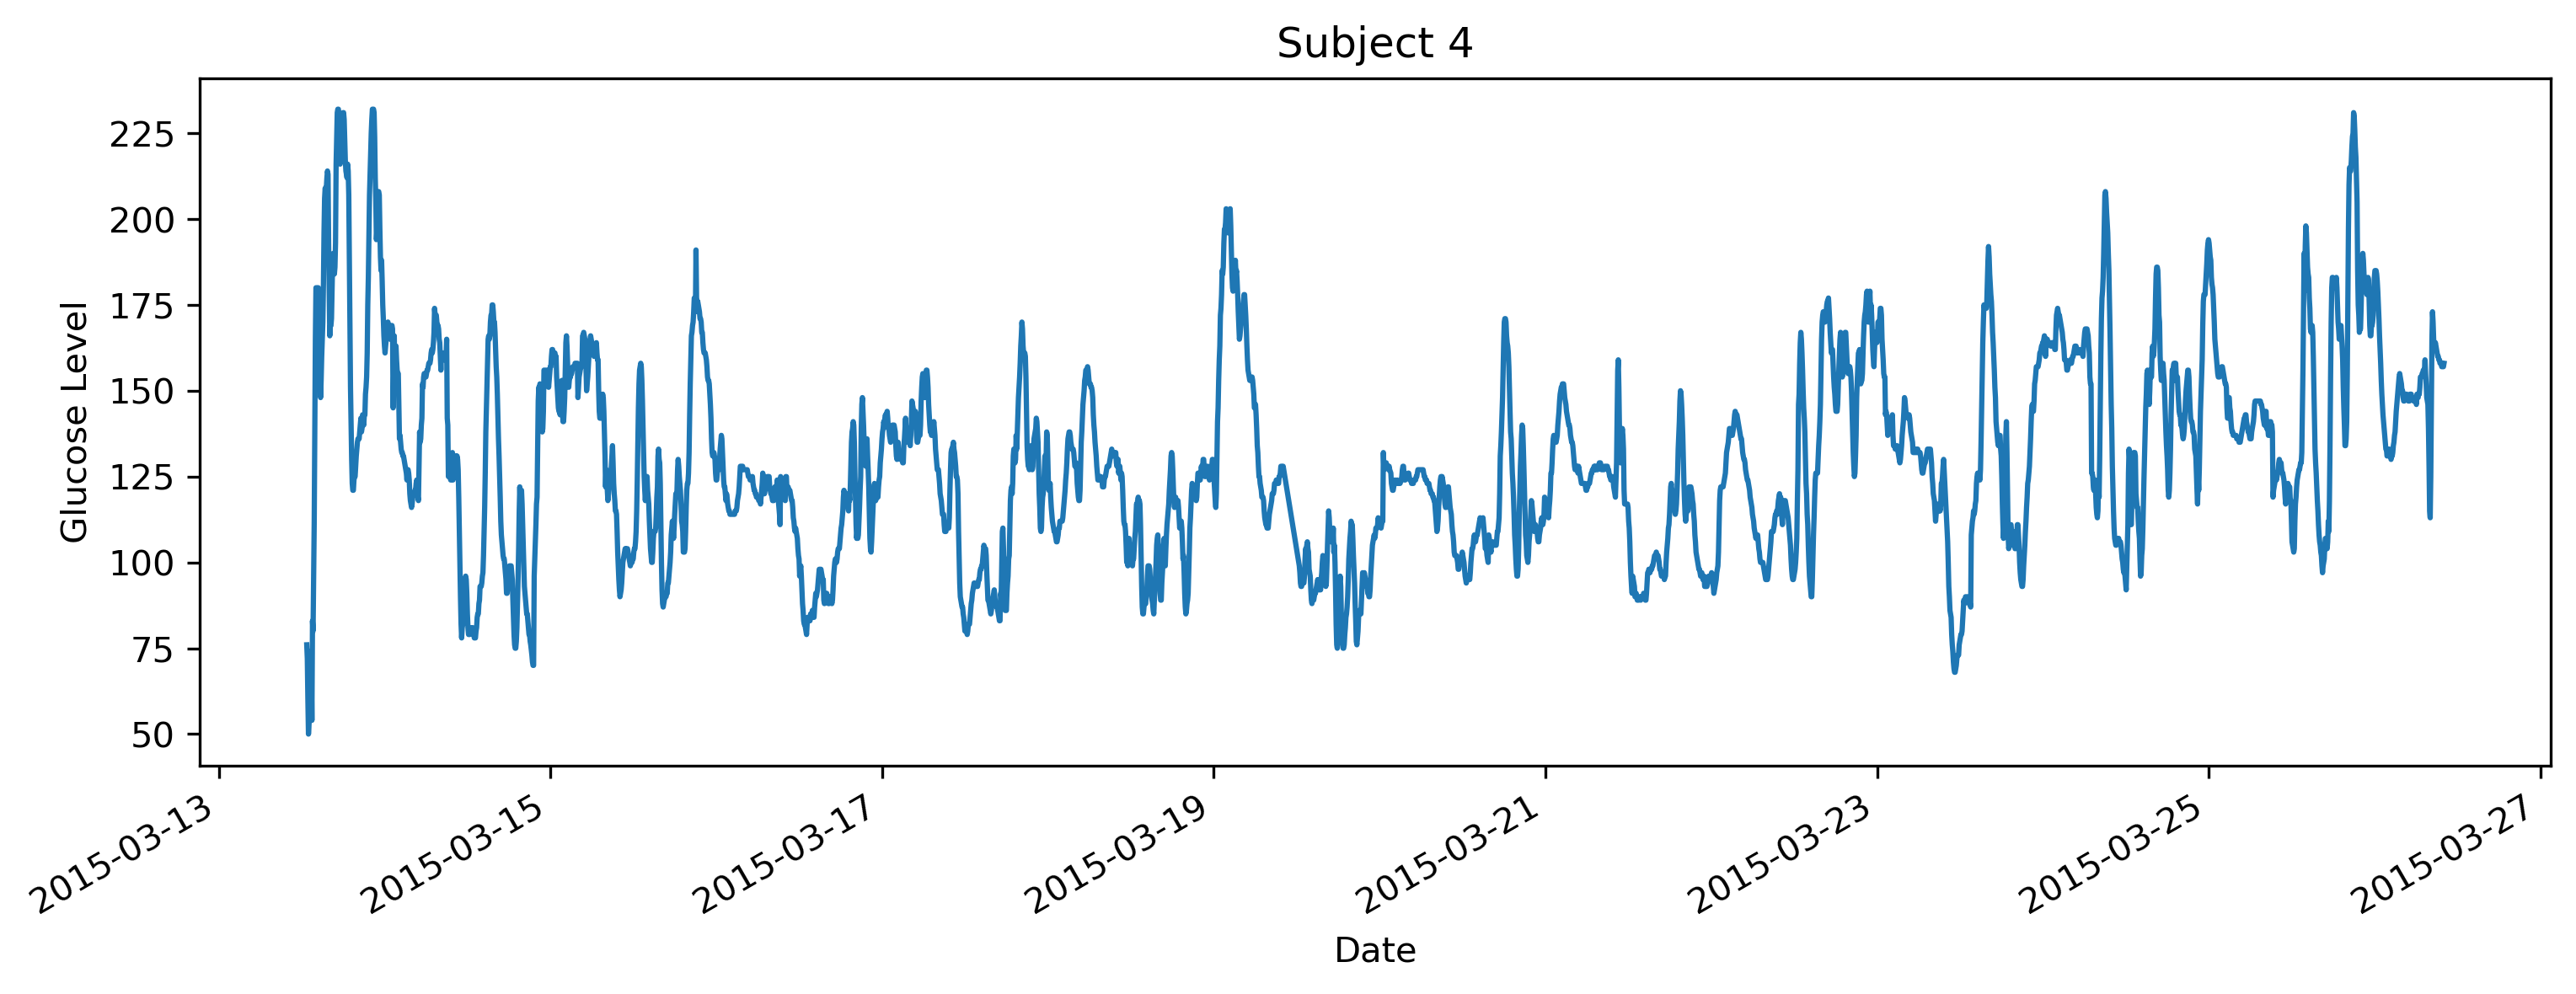

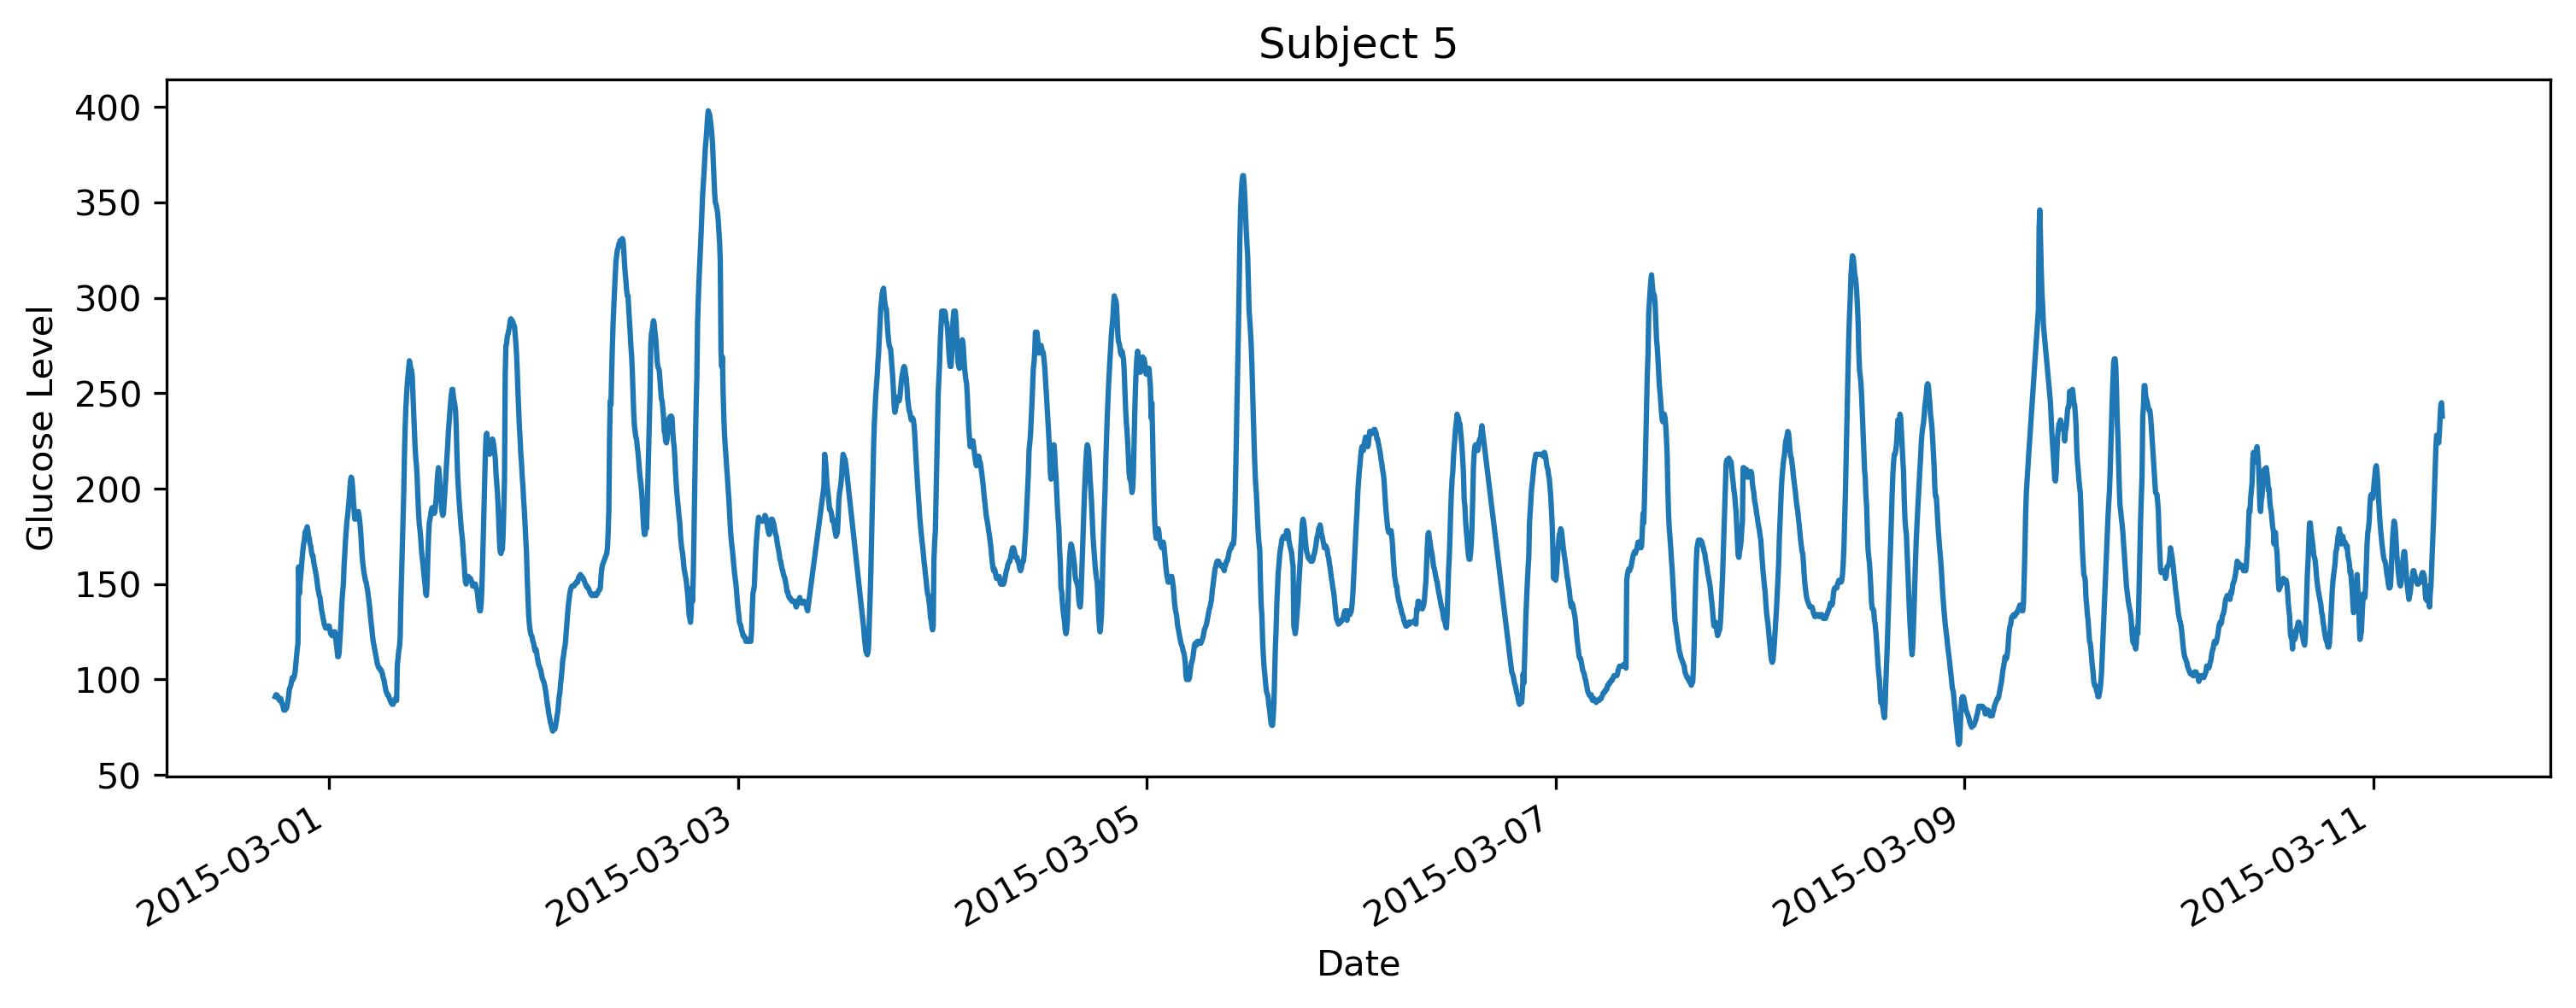

In [5]:
# Plot Subjects
for subject in subjects:
    x = subj_data[subject].time # Time for x-axis
    y = subj_data[subject].gl # Glucose for y-axis

    fig, ax = plt.subplots(figsize = (12,4), dpi = 300)
    ax.plot(x, y)
    plt.title(subject)
    plt.xlabel("Date")
    plt.ylabel("Glucose Level")
    
    fig.autofmt_xdate() # slant x-axis
    plt.show()